Start with Shrinkage models:

In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoLarsCV
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv('data/price_data_filtered.csv', index_col=0, parse_dates=True)
data.tail()

,STOXX EUROPE 600 \nE - PRICE INDEX,STOXX EUROPE 600 \nBANKS E - PRICE INDEX,STOXX EUROPE 600 \nFINANCIALS E - PRICE INDEX,STOXX EUROPE 600 \nAUTO & PARTS E - PRICE INDEX,STOXX EUROPE 600 \nINSURANCE E - PRICE INDEX,STOXX EUROPE 600 \nTECHNOLOGY E - PRICE INDEX,STOXX EUROPE 600 \nUTILITIES E - PRICE INDEX,STOXX EUROPE 600 \nCHEMICALS E - PRICE INDEX,STOXX EUROPE 600 \nBASIC RESOURCE E - PRICE INDEX,STOXX EUROPE 600 \nCON & MAT E - PRICE INDEX,STOXX EUROPE 600 \nHEALTH CARE E - PRICE INDEX,STOXX EUROPE 600 \nINDS GDS & SVS E - PRICE INDEX,STOXX EUROPE 600 \nMEDIA E - PRICE INDEX,STOXX EUROPE 600 \nTELECOM E - PRICE INDEX
2021-09-01,473.123,137.105,218.459,625.259,309.675,816.033,396.884,1312.686,593.656,631.365,1040.949,779.914,360.955,240.289
2021-10-01,452.897,139.835,215.834,630.213,303.691,741.713,363.426,1248.539,540.547,581.521,986.327,737.698,351.207,228.949
2021-11-01,478.865,150.619,231.872,678.609,320.779,807.080,392.884,1316.179,564.657,617.930,1056.962,762.544,356.543,223.070
2021-12-01,470.862,139.734,220.570,656.661,310.670,812.144,389.468,1306.550,570.064,611.488,1030.112,760.739,359.789,225.157
2022-01-01,489.988,146.388,229.872,675.257,325.112,806.015,407.840,1368.250,601.215,647.029,1076.658,802.949,372.238,231.135


In [31]:
X = data.index.values.reshape(-1, 1)
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = X_test.astype('float64')

In [35]:
ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)
#print(ridge.score(X_test, y_test))
ridge_pred = ridge.predict(X_test)

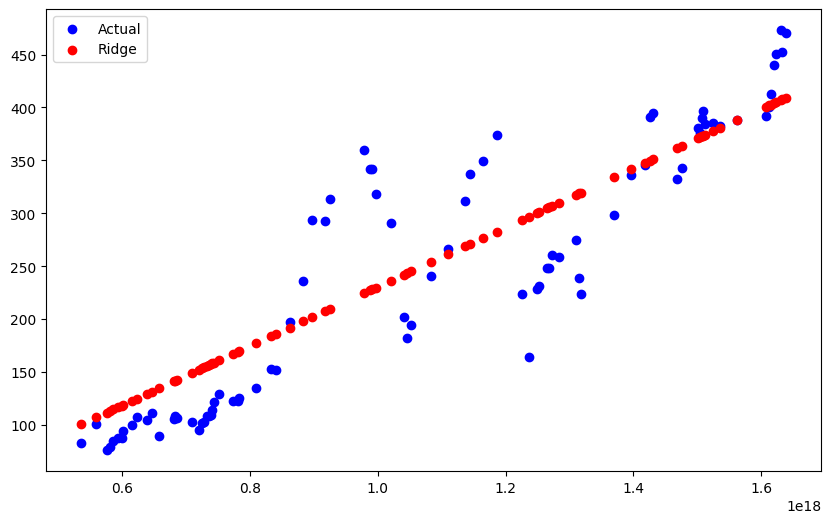

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, ridge_pred, color='red', label='Ridge')

plt.legend()
plt.show()

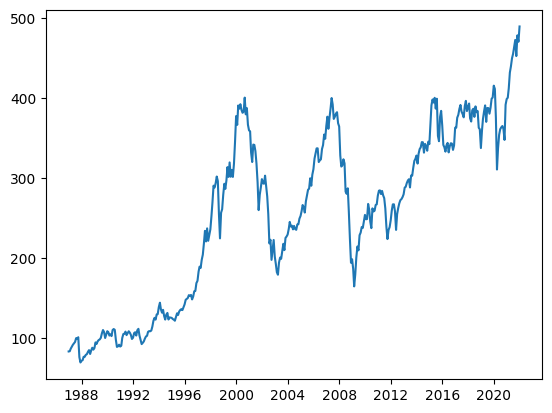

In [ ]:
plt.plot(X,y)
plt.show()

In [42]:
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]
def train_and_predict(model):
    X_train = train_data.index.values.reshape(-1, 1)
    y_train = train_data.iloc[:, 0].values
    X_test = test_data.index.values.reshape(-1, 1)
    y_test = test_data.iloc[:, 0].values
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_test, y_pred
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
lassolars = LassoLarsCV()
models = [ridge, lasso, elastic, lassolars]
results = []
for model in models:
    y_test, y_pred = train_and_predict(model)
    results.append((y_test, y_pred))
fig, ax = plt.subplots(figsize=(10, 6))
for i, (y_test, y_pred) in enumerate(results):
    ax.plot(test_data.index, y_test, label='Actual' if i==0 else "", color='blue')
    ax.plot(test_data.index, y_pred, label=models[i].__class__.__name__, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
ax.legend()
plt.show()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)